<a href="https://colab.research.google.com/github/MathiasSchindlerCPH/BSE-T2-ML-and-Causal-Inf-repo/blob/main/PSET1_CI_and_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning and Causal Inference – Problem Set 1**

Submission Date: Feb 1, 2022 <br>
Author: Mathias Schindler <br>
Institution: Barcelona School of Economics, Data Science for Decision Making Program, Class of '22


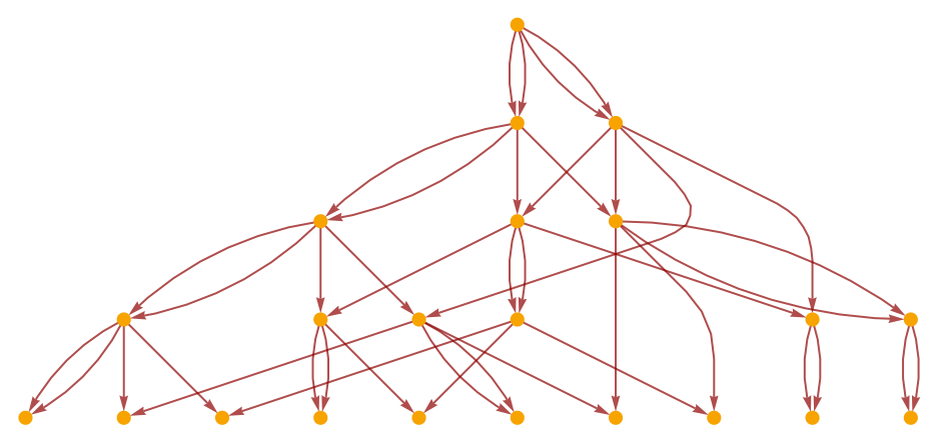

# Preamble

In [101]:
# Load packages
import numpy as np
import pandas as pd

# Create aliases for random generators, better readibility of code
from numpy.random import binomial as bern
from numpy.random import normal as nrm

# Set random seed for reproducibility 
np.random.seed(3123) 

# Reproduction of Exc 1.A using Python

Simulate with $n=10,000$ draws and variables `T` (treatment) and `O` (outcome).

In [102]:
n = 10000
T = bern(n = 1, p = 0.5, size = n)
O = bern(n = 1, p = 0.3, size = n)*T + bern(n = 1, p = 0.5, size = n)*(1-T)

In [103]:
# Put into dataframe to ease slicing/conditioning
df1 = pd.DataFrame({'T': T, 'O': O})
df1.head()

,T,O
0,1,0
1,0,0
2,1,0
3,1,1
4,0,1


1) $O\vert T = 1$ is the filtered dataframe where `T == 1`.

In [104]:
print(df1[df1['T'] == 1].head() )

   T  O
0  1  0
2  1  0
3  1  1
7  1  0
8  1  0


2) Now consider only the column `O` as illustrated below

In [105]:
print(df1[df1['T'] == 1]['O'].head() )

0    0
2    0
3    1
7    0
8    0
Name: O, dtype: int64


3) As $O\in\{0,1\}$, take `.mean()` of dataframe above to obtain $\Pr(O=1\vert T = 1) = \mathbb{E}(O=1\vert T = 1)$

In [106]:
print(df1[df1['T'] == 1]['O'].mean())

0.2956539074960128


4) Same analogy to find $ATE = \Pr(O=1\vert T = 1) - \Pr(O=1\vert T = 0) = \mathbb{E}(O=1\vert T = 1) - \mathbb{E}(O=0\vert T = 1)$

In [107]:
# Conditional expectations
O1T1 = df1[df1['T'] == 1]['O'].mean()
O1T0 = df1[df1['T'] == 0]['O'].mean()

# ATE
ATE = O1T1 - O1T0
print(ATE)

-0.19933004113962127


# 1. Simulation Exercises

## 1.1 Confounder

![[removal.ai]_tmp-61f2b4cd9ef71.png](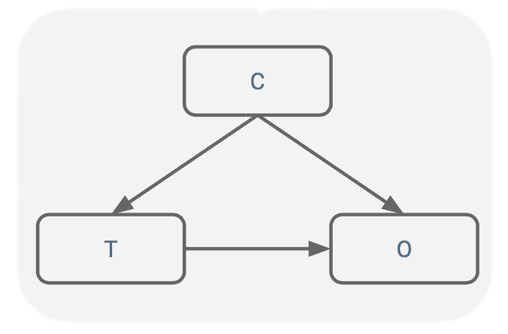)

In [86]:
# Create DGP
n = 10000
e = nrm(loc=0.0, scale=1.0, size= n)

C = bern(n = 1, p = 0.8, size = n)
T = bern(n = 1, p = 0.6, size = n)*C + bern(n = 1, p = 0.2, size = n)*(1-C)
O = bern(n = 1, p = 0.3, size = n)*T + bern(n = 1, p = 0.5, size = n)*(1-T) + C + e

In [87]:
# Create dataframe to ease slicing/conditioning
df1 = pd.DataFrame({'C': C, 'T': T, 'O': O})
df1.head(10)

,C,T,O
0,1,1,2.438145
1,1,0,0.500891
2,1,0,3.225912
3,1,1,2.911297
4,1,1,1.955076
5,1,1,1.067959
6,1,1,-0.040185
7,0,0,-1.852586
8,1,1,0.767574
9,1,1,0.491468


In [ ]:
# Calculations


Theoretically
$$P(C\vert do(T=1)) = P(C) =P(C\vert do(T=0))= 0.8 $$
And
$$P(O\vert do(T = 1)) = 0.3*1+0.5*0+0.8+\overbrace{P(ɛ)}^{=0}= 1.1$$
$$P(O\vert do(T = 0)) = 0.3*0+0.5*1+0.8+\overbrace{P(ɛ)}^{=0}= 1.3$$
Then
$$ATE = P(O\vert do(T = 1)) - P(O\vert do(T = 0)) = 1.1-1.3 = -0.2$$

## 1.2 Mediator

![[removal.ai]_tmp-61f2b4f633e9f.png](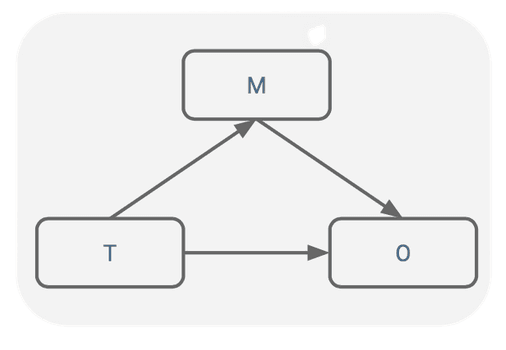)

In [88]:
# Create DGP
n = 10000
e = nrm(loc=0.0, scale=1.0, size= n)

T = bern(n = 1, p = 0.4, size = n)
M = bern(n = 1, p = 0.6, size = n)*T + bern(n = 1, p = 0.2, size = n)*(1-T)
O = bern(n = 1, p = 0.4, size = n)*T + bern(n = 1, p = 0.5, size = n)*(1-T) + M + e

In [89]:
# Create dataframe to ease slicing/conditioning
df2 = pd.DataFrame({'T': T, 'M': M, 'O': O})
df2.head(10)

,T,M,O
0,1,0,-1.035815
1,0,0,0.533164
2,0,0,-0.581972
3,1,0,0.922346
4,0,0,0.914499
5,0,1,-0.433138
6,0,1,1.471711
7,1,1,-0.530479
8,1,0,2.230555
9,0,0,1.817480


In [ ]:
# Calculations


Theoretically
$$P(M\vert do(T=1)) = 0.6*1+0.2*0 = 0.6 $$
$$P(M\vert do(T=0)) = 0.6*0+0.2*1 = 0.2 $$
And
$$P(O\vert do(T = 1)) = 0.4*1+0.5*0+0.6+\overbrace{P(ɛ)}^{=0}= 1.0$$
$$P(O\vert do(T = 0)) = 0.4*0+0.5*1+0.2+\overbrace{P(ɛ)}^{=0}= 0.7$$
Then
$$ATE = P(O\vert do(T = 1)) - P(O\vert do(T = 0)) = 1.0-0.7 = 0.3$$

## 1.3 Predictor

![[removal.ai]_tmp-61f2b50ce4cd7.png](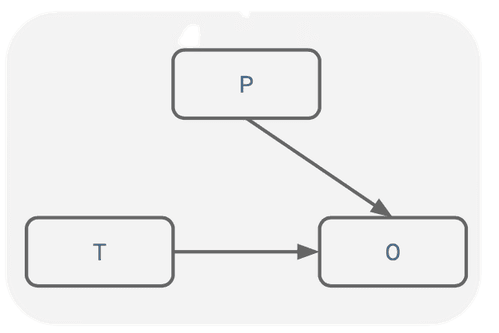)

In [90]:
# Create DGP
n = 10000
e = nrm(loc=0.0, scale=1.0, size= n)

T = bern(n = 1, p = 0.4, size = n)
P = bern(n = 1, p = 0.4, size = n)
O = bern(n = 1, p = 0.4, size = n)*T + bern(n = 1, p = 0.5, size = n)*(1-T) + P + e

In [91]:
# Create dataframe to ease slicing/conditioning
df3 = pd.DataFrame({'T': T, 'P': P, 'O': O})
df3.head(10)

,T,P,O
0,0,1,1.360904
1,0,1,2.598549
2,0,0,2.295757
3,1,1,0.559761
4,0,1,0.897903
5,0,1,2.165782
6,1,1,0.810056
7,1,0,0.388959
8,1,0,0.852510
9,1,1,1.584789


In [ ]:
# Calculations


Theoretically
$$P(P\vert do(T=1)) = P(P) =P(P\vert do(T=0))= 0.4 $$
And
$$P(O\vert do(T = 1)) = 0.4*1+0.5*0+0.4+\overbrace{P(ɛ)}^{=0}= 0.8$$
$$P(O\vert do(T = 0)) = 0.4*0+0.5*1+0.4+\overbrace{P(ɛ)}^{=0}= 0.9$$
Then
$$ATE = P(O\vert do(T = 1)) - P(O\vert do(T = 0)) = 0.8-0.9 = -0.1$$

## 1.4 Unobserved Confounder


![[removal.ai]_tmp-61f2b53204b18.png](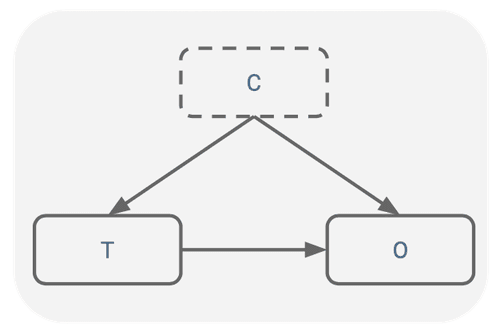)

In [92]:
# Create DGP
n = 10000
e = nrm(loc=0.0, scale=1.0, size= n)

C = bern(n = 1, p = 0.8, size = n)
T = bern(n = 1, p = 0.6, size = n)*C+bern(n = 1, p = 0.2, size = n)*(1-C)
O = bern(n = 1, p = 0.3, size = n)*T + bern(n = 1, p = 0.5, size = n)*(1-T) + C + e

In [93]:
# Create dataframe to ease slicing/conditioning
df4 = pd.DataFrame({'C':C, 'T': T, 'O': O})
df4.head(10)

,C,T,O
0,1,1,0.571849
1,1,0,0.896501
2,0,0,-0.459058
3,0,0,0.416204
4,1,1,0.370249
5,0,0,0.883117
6,1,1,1.816540
7,1,1,1.883321
8,1,1,1.598305
9,1,0,0.389789


In [ ]:
# Calculations


Theoretically
$$P(C\vert do(T=1)) = P(C) =P(C\vert do(T=0))= 0.8 $$
And
$$P(O\vert do(T = 1)) = 0.3*1+0.5*0+0.8+\overbrace{P(ɛ)}^{=0}= 1.1$$
$$P(O\vert do(T = 0)) = 0.3*0+0.5*1+0.8+\overbrace{P(ɛ)}^{=0}= 1.3$$
Then
$$ATE = P(O\vert do(T = 1)) - P(O\vert do(T = 0)) = 1.1-1.3 = -0.2$$

# 2. Theoretical Exercise